03_220d_5_step_no_opti_tsu
02_220d_3_step_no_opti_tsu
01_220d_2_step_no_opti_tsu


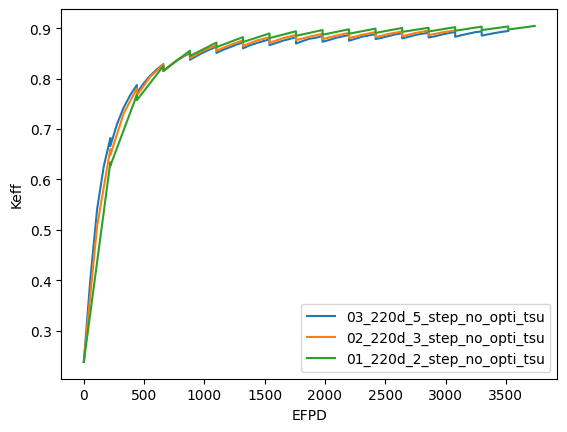

Executing <Task pending coro=<Kernel.dispatch_queue() running at /home/stalex/repos/01_wh_lfr/.direnv/python-3.7.13/lib/python3.7/site-packages/ipykernel/kernelbase.py:510> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7f84416a74e0>()] created at /home/stalex/repos/01_wh_lfr/.direnv/python-3.7.13/lib/python3.7/site-packages/tornado/queues.py:248> cb=[IOLoop.add_future.<locals>.<lambda>() at /home/stalex/repos/01_wh_lfr/.direnv/python-3.7.13/lib/python3.7/site-packages/tornado/ioloop.py:687] created at /home/stalex/repos/01_wh_lfr/.direnv/python-3.7.13/lib/python3.7/site-packages/tornado/gen.py:874> took 1.380 seconds


In [1]:
import copy
import re
import os
from pathlib import Path
from typing import List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import serpentTools
from serpentTools.parsers.results import ResultsReader

serpentTools.settings.rc["serpentVersion"] = "2.1.32"

BASE_PATH = Path.cwd()

def pathconstructor(index):
    return BASE_PATH / f"03_220d_5_step_no_opti_tsu/wh_lfrsuffleNo{index}/wh_lfr_res.m"
    # return BASE_PATH/f"wh_lfr_res.m"


def main() -> None:
    folders = [f for f in os.listdir('.') if os.path.isdir(f)]
    
    for simulation_name in folders:
        print(simulation_name)
        list_of_files = sorted(Path(simulation_name).rglob("wh_lfr_res.m"))
        # Probable ISSUE, it may pick up any left over res.m file in the simulation folder     
        files_str = [str(file) for file in list_of_files]
        files_str.sort(key=lambda f: int(re.sub(r"\D", "", f)))
        with serpentTools.settings.rc:
            serpentTools.settings.rc["verbosity"] = "error"
            files_read = [serpentTools.read(file_loc) for file_loc in files_str]

        keffs = np.concatenate([reader.resdata["absKeff"][:, 0] for reader in files_read])
        base_time_scale = files_read[0].resdata["burnDays"][0:,0]
        one_period = np.max(files_read[0].resdata["burnDays"])
        time_array = base_time_scale

        time_array = np.concatenate(
            [base_time_scale + idx * one_period for idx in range(0, len(files_read))]
        )

        plt.plot(time_array, keffs)
        plt.legend(folders, loc="lower right")

    breakpoint() 
    plt.xlabel("EFPD")
    plt.ylabel("Keff")
    plt.show()
    #plt.savefig("keff_vs_days.png")

if __name__ == "__main__":
    main()

In [6]:
# sub region of the original image
x1, x2, y1, y2 = -1.5, -0.9, -2.5, -1.9
plt.set_xlim(x1, x2)
plt.set_ylim(y1, y2)
plt.set_xticklabels([])
plt.set_yticklabels([])

plt.axis([x_min, x_max, y_min, y_max])

NameError: name 'x_min' is not defined